[Nonfinancial Corporate Business; Corporate Equities as a Percentage of Net Worth, Level](https://fred.stlouisfed.org/series/BOGZ1FL103164106A)

[additional](https://www.farooq-javed.com/farooqjaved/2023/7/28/tail-hedging)

[set](https://www.set.or.th/th/market/statistics/market-statistics/main)

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime

In [2]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8')

# Set the font family to Tahoma
plt.rcParams['font.family'] = 'Tahoma'

In [3]:
# Dictionary to map Thai month abbreviations to month numbers
thai_months = {
    "ม.ค.": 1,
    "ก.พ.": 2,
    "มี.ค.": 3,
    "เม.ย.": 4,
    "พ.ค.": 5,
    "มิ.ย.": 6,
    "ก.ค.": 7,
    "ส.ค.": 8,
    "ก.ย.": 9,
    "ต.ค.": 10,
    "พ.ย.": 11,
    "ธ.ค.": 12
}

def convert_thai_date(thai_date):
    # Split the input string
    thai_month_abbr, buddhist_year = thai_date.split("-")
    
    # Convert the Thai month abbreviation to a month number
    month = thai_months[thai_month_abbr.strip()]
    
    # Convert the Buddhist year to Gregorian year
    year = int(buddhist_year.strip())
    if year >= 88:
        year += 1900
    else:
        year += 2000
    # Use the first day of the month for the conversion
    day = 1
    
    # Create a datetime object
    date = datetime(year, month, day)
    
    # Return the formatted date in "Y-M-d" format
    return date.strftime("%Y-%m-%d")

In [4]:
df = pd.read_csv('./Table_PBV.csv', skiprows=3)

In [5]:
df.head()

,Month-Year,SET,SET50,SET50FF,SET100,SET100FF,sSET,SETCLMV,SETHD,SETESG,SETWB,mai
0,ก.ค.-24,1.24,1.47,1.23,1.41,1.19,0.94,1.13,0.85,1.22,2.36,1.66
1,มิ.ย.-24,1.22,1.43,1.20,1.39,1.18,0.95,1.10,0.95,1.20,2.51,1.79
2,พ.ค.-24,1.26,1.46,1.24,1.43,1.22,1.00,1.14,0.98,1.26,2.61,1.90
3,เม.ย.-24,1.32,1.53,1.31,1.50,1.29,1.04,1.19,0.99,1.33,2.75,2.02
4,มี.ค.-24,1.33,1.56,1.32,1.52,1.30,1.05,1.18,1.00,1.35,2.73,2.11


In [6]:
df['SET50'] = pd.to_numeric(df['SET50'], errors='coerce')

In [7]:
selected_df = df[['Month-Year', 'SET50']].dropna(axis=0)[::-1].copy()

In [8]:
selected_df.head()

,Month-Year,SET50
337,มิ.ย.-96,2.93
336,ก.ค.-96,2.47
335,ส.ค.-96,2.54
334,ก.ย.-96,2.55
333,ต.ค.-96,2.07


In [9]:
selected_df['Month-Year'] = selected_df['Month-Year'].apply(convert_thai_date)
selected_df['Month-Year'] = pd.to_datetime(selected_df['Month-Year'])

In [10]:
selected_df.set_index('Month-Year', inplace=True)

In [11]:
selected_df['log-SET'] = np.log(selected_df['SET50'])

In [12]:
# selected_df['SET'][::-1].cumprod()** (1 / np.arange(1, len(selected_df)+1))
selected_df['gmean-SET'] = np.exp(selected_df['log-SET'].cumsum() / np.arange(1, len(selected_df)+1))

In [13]:
selected_df['scaled-SET'] = selected_df['SET50'] / selected_df['gmean-SET'].shift()

In [14]:
n = 4
selected_df['quarter'], bins = pd.qcut(selected_df['scaled-SET'], q=n, labels=False, retbins=True)

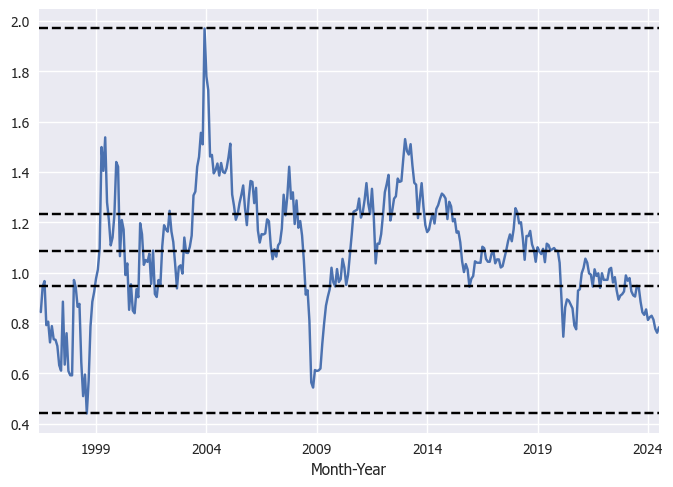

In [15]:
selected_df['scaled-SET'].plot();
for b in bins:
    plt.axhline(y = b, color = 'k', linestyle = '--') 

In [16]:
selected_df

,SET50,log-SET,gmean-SET,scaled-SET,quarter
Month-Year,,,,,
1996-06-01,2.93,1.075002,2.930000,NaN,NaN
1996-07-01,2.47,0.904218,2.690186,0.843003,0.0
1996-08-01,2.54,0.932164,2.639162,0.944173,0.0
1996-09-01,2.55,0.936093,2.616584,0.966216,1.0
1996-10-01,2.07,0.727549,2.496789,0.791108,0.0
...,...,...,...,...,...
2024-03-01,1.56,0.444686,1.881921,0.828474,0.0
2024-04-01,1.53,0.425268,1.880758,0.812999,0.0
2024-05-01,1.46,0.378436,1.879341,0.776283,0.0


In [17]:
set_index = pd.read_csv('./Table_Index.csv', skiprows=3)
set_index['SET501/'] = set_index['SET501/'].str.replace(',', '')

set_index['SET501/'] = pd.to_numeric(set_index['SET501/'], errors='coerce')
set_index = set_index[['Month-Year', 'SET501/']].dropna(axis=0)[::-2].copy()

set_index['Month-Year'] = set_index['Month-Year'].apply(convert_thai_date)
set_index['Month-Year'] = pd.to_datetime(set_index['Month-Year'])

In [18]:
set_index.set_index('Month-Year', inplace=True)

In [19]:
selected_df['set-index'] = set_index

In [20]:
selected_df['ret'] = selected_df['set-index'].pct_change()

In [21]:
selected_df.to_csv('set50.csv')

In [22]:
selected_df['quarter-shift'] = selected_df['quarter'].shift(1)

In [23]:
state_switching = []
for (present, past) in zip(selected_df['quarter'], selected_df['quarter-shift']):
    if np.isnan(present) or np.isnan(past):
        state_switching.append(np.nan)
    else:
        state_switching.append(f'{int(past)}=>{int(present)}')

In [24]:
selected_df['regime-switching'] = state_switching

In [25]:
selected_df['regime-switching'].value_counts()

regime-switching
0=>0    69
3=>3    66
1=>1    54
2=>2    50
2=>3    18
3=>2    17
1=>2    16
2=>1    15
0=>1    14
1=>0    14
3=>1     1
0=>2     1
2=>0     1
Name: count, dtype: int64

In [26]:
selected_df[selected_df['regime-switching'] == '1=>3']

,SET50,log-SET,gmean-SET,scaled-SET,quarter,set-index,ret,quarter-shift,regime-switching
Month-Year,,,,,,,,,


In [27]:
m = 100000
d = 4

for i in selected_df['regime-switching'].dropna().unique():

    mask_index = selected_df[selected_df['regime-switching'] == i].index
    rets = []
    for mi in mask_index:
        rets += selected_df.loc[mi: mi + pd.DateOffset(months=11)]['ret'].tolist()
    
    bootstrapping_sample = np.random.choice(rets, size=(m, d), replace=True) + 1
        
    ret_rest = np.prod(bootstrapping_sample, axis=1)
    
    # plt.hist(ret_rest, bins=100)
    # plt.title(f'Class:{i}\nGrowth: {np.median(ret_rest):.2f}\n5th: {np.quantile(ret_rest, 0.05):.2f}\n95th: {np.quantile(ret_rest, 0.95):.2f}')
    # plt.show()
    
    print(f'''
    Class:{i}
    growth rate (median): {np.median(ret_rest):.2f}
    mean: {np.mean(ret_rest):.2f}
    std: {np.std(ret_rest):.2f}
    5th: {np.quantile(ret_rest, 0.05):.2f}
    95th: {np.quantile(ret_rest, 0.95):.2f}''')
    


    Class:0=>0
    growth rate (median): 1.00
    mean: 1.02
    std: 0.29
    5th: 0.61
    95th: 1.59

    Class:0=>1
    growth rate (median): 1.00
    mean: 1.03
    std: 0.21
    5th: 0.75
    95th: 1.45

    Class:1=>0
    growth rate (median): 1.00
    mean: 1.00
    std: 0.21
    5th: 0.68
    95th: 1.35

    Class:1=>1
    growth rate (median): 1.03
    mean: 1.05
    std: 0.12
    5th: 0.88
    95th: 1.27

    Class:1=>2
    growth rate (median): 1.03
    mean: 1.07
    std: 0.17
    5th: 0.83
    95th: 1.39

    Class:2=>3
    growth rate (median): 1.00
    mean: 1.01
    std: 0.16
    5th: 0.78
    95th: 1.30

    Class:3=>3
    growth rate (median): 1.00
    mean: 1.01
    std: 0.13
    5th: 0.81
    95th: 1.23

    Class:3=>2
    growth rate (median): 1.00
    mean: 0.98
    std: 0.13
    5th: 0.75
    95th: 1.16

    Class:2=>2
    growth rate (median): 1.00
    mean: 1.01
    std: 0.13
    5th: 0.80
    95th: 1.23

    Class:3=>1
    growth rate (median): 0.83
    mean